## Random Walks and the Central Limit Theorem

Kyle P. Rasku MS RN BSN

In [1]:
import numpy
import pandas
import random

In [2]:
def random_walk(n, choices=[(0, 1), (0, -1), (1, 0), (-1, 0)]):
    x, y = 0, 0
    for i in range(n):
        (dx, dy) = random.choice(choices)
        x += dx
        y += dy
    return x, y


### The most basic Discrete Stochastic Process: a fair Random Walk

We can take some arbitrarily large number of "walks" (equivalent to drawing a large # of samples) of n "steps" (size n) where:

1. n is a discrete, randomly-chosen coordinate adjustment from the default 'choices' list, defined above in the random walk function
2. each possible n has a 25% chance of being chosen
3. we assume that each "step" takes place at a discrete time-point, equivalent to the # of the steps, 0 - n

### This process creates a sampling distribution of sample means

1. The samples are the walks having n steps
2. The samples means are the mean distances traveled from the origin during each walk of n steps
3. The number of times we sample is the total number of walks (generally, a very large number)

### The sampling distribution of the sample mean follows the Central Limit Theorem (CLT)

The population does not need to be normally distributed, but as long as the sample size (n) > 30, the sampling distribution of the sample means will approximate a normal distribution.

In [3]:
# Try walking 100 fair steps, 10,000 times
num_walks = 10000
steps_per_walk = 100

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

10000 simulations of 100 steps will be run.


In [4]:

distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    end_coords = random_walk(steps_per_walk)
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])

# print("Lengths of all walks tried: ")
# distances

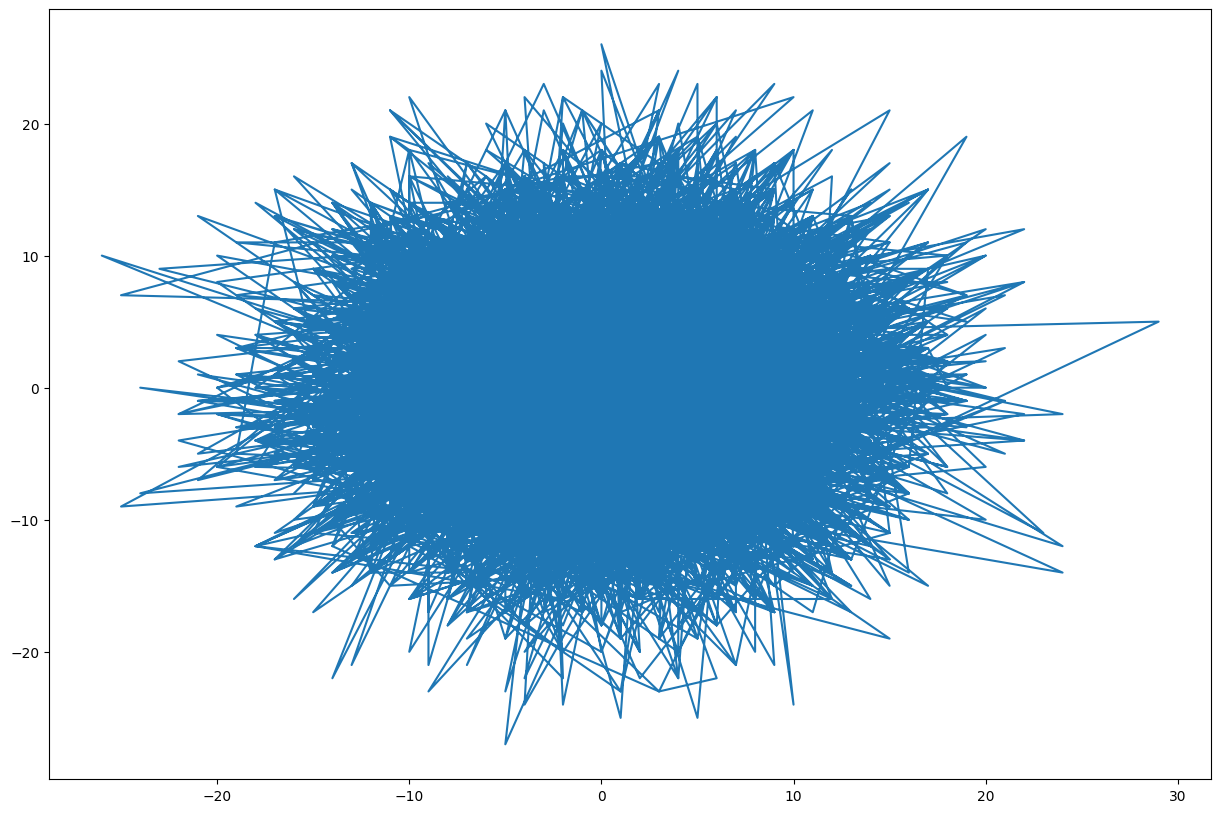

In [5]:
import matplotlib.pyplot as plt

# Plot the raw coordinates of the walks

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

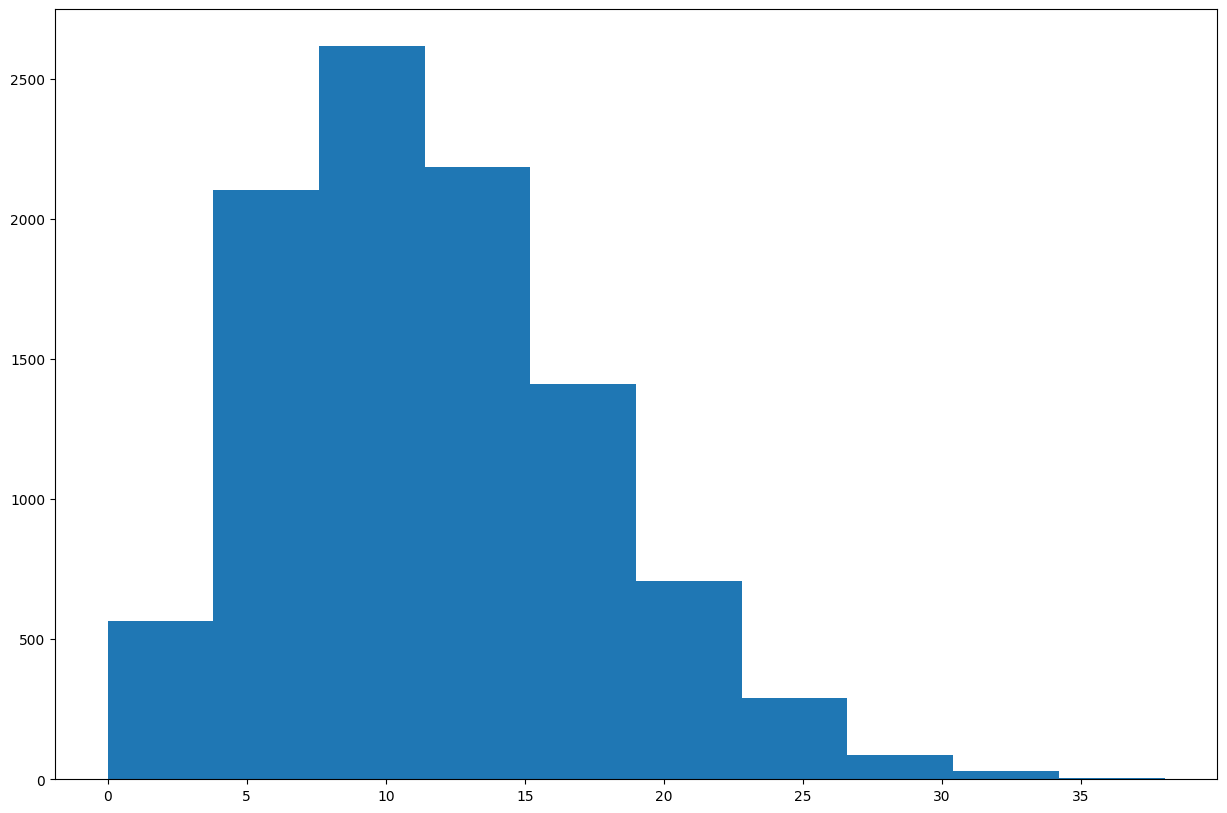

In [6]:

# plot a histogram of the distances (absolute length traveled from the starting point)

f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

In [7]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    10000.000000
mean         0.130000
std          7.000271
min        -26.000000
25%         -4.000000
50%          0.000000
75%          5.000000
max         29.000000
dtype: float64

In [8]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    10000.000000
mean         0.018800
std          7.145779
min        -27.000000
25%         -5.000000
50%          0.000000
75%          5.000000
max         26.000000
dtype: float64

In [9]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    10000.000000
mean        11.279600
std          6.046675
min          0.000000
25%          6.000000
50%         10.000000
75%         16.000000
max         38.000000
dtype: float64

In [10]:
print("The mean distance walked is", stats[1])

The mean distance walked is 11.2796


In [11]:
print("The variance is", stats[2]**2)

The variance is 36.56228006800679


In [12]:
print("The mean is", stats[1]/(stats[2]**2) * 100, "% of the variance.")

The mean is 30.850373606404336 % of the variance.


In [13]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 17.32627512505896


In [14]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 5.23292487494104


In [15]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is 1.2796000000000003


### An Unfair Random Walk

In [16]:
# An unfair walk, where one or more directions are favored or penalized.
num_walks = 10000
steps_per_walk = 100

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

10000 simulations of 100 steps will be run.


In [17]:

distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    # weighting the walk-choices, so walking N (increasing Y) will be favored, and walking S (decreasing Y) will be penalized
    # try plugging in a variety of "unfair" weights and see how the statistical summaries change
    end_coords = random_walk(steps_per_walk, [(0, 1.5), (0, -0.5), (1, 0), (-1, 0)])
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])

# print("Lengths of all walks tried: ")
# distances

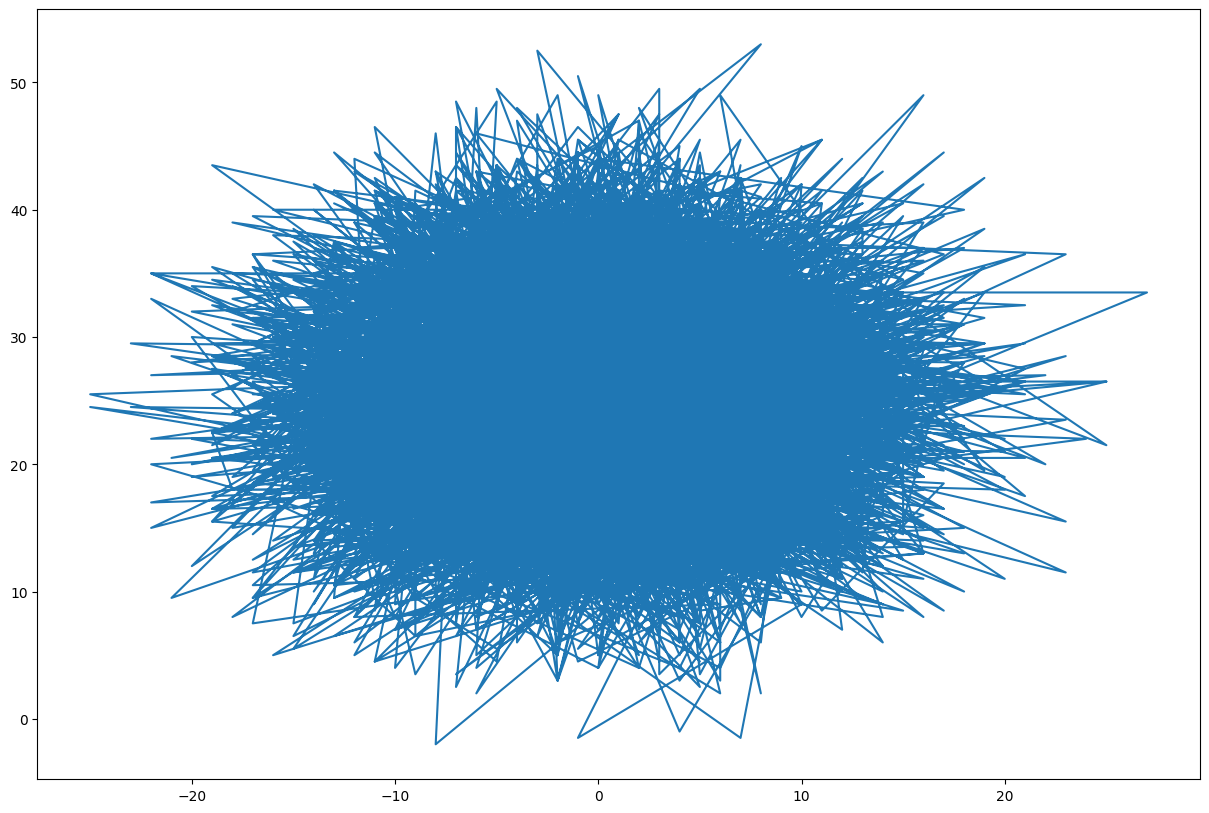

In [18]:
import matplotlib.pyplot as plt

# Plot the raw coordinates of the walks

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

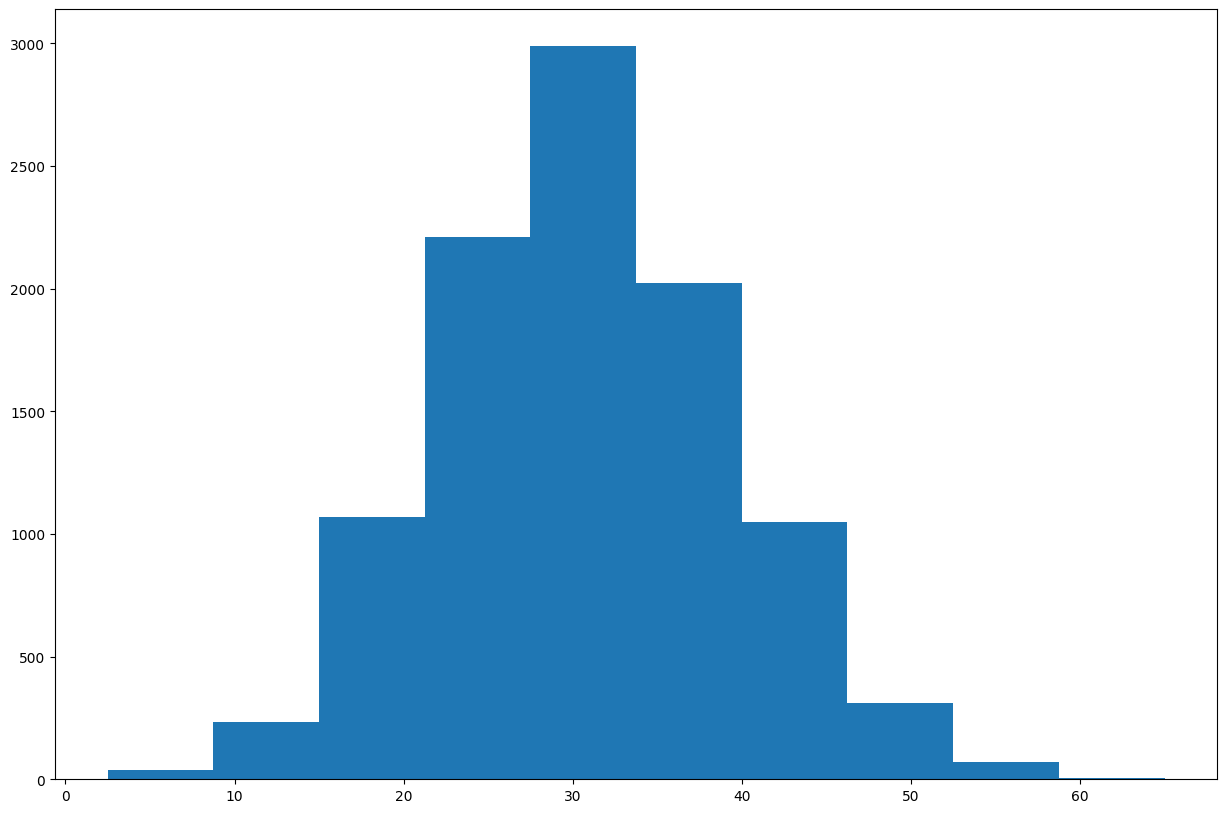

In [19]:

# plot a histogram of the distances (absolute length traveled from the starting point)

f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

In [20]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    10000.000000
mean         0.017400
std          7.104108
min        -25.000000
25%         -5.000000
50%          0.000000
75%          5.000000
max         27.000000
dtype: float64

In [21]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    10000.000000
mean        24.936300
std          7.500678
min         -2.000000
25%         20.000000
50%         25.000000
75%         30.000000
max         53.000000
dtype: float64

In [22]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    10000.000000
mean        30.620100
std          8.543359
min          2.500000
25%         24.500000
50%         30.500000
75%         36.125000
max         65.000000
dtype: float64

In [23]:
print("The mean distance walked is", stats[1])

The mean distance walked is 30.6201


In [24]:
print("The variance is", stats[2]**2)

The variance is 72.98897488748875


In [25]:
print("The mean is", stats[1]/(stats[2]**2) * 100, "% of the variance.")

The mean is 41.95167838320836 % of the variance.


In [26]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 39.163458525046735


In [27]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 22.076741474953266


In [28]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is 0.12010000000000076


The same number of walks with the same number of steps - but when N is favored over S by .1, the variance increases by 7.2.

When N is favored over S by .5, and S is dis-favored by an additional .5, the variance then increases by 38 - it doubles. And when N is favored over S by 1.5, and S is dis-favored likewise, variance increases again by 71.

Note the change in the y-axis range in the plot of the fair walk vs. the unfair walk. The range of the fair walk is about equal in every direction, while the range of the unfair walk predictably positively-skews along the y-axis.

Try this for yourself with different variations and demonstrate probability on your own!

## Adding Wormholes

Not only do small changes in bias impact the measures and skew of many real world probabilities and outcomes, but randomness plays an additional part in modifying trajectories that might otherwise seem more predictable.

In the fair random walk, the mean and variance were pretty constant.  While we couldn't predict exactly where any individual walk would travel, overall we could easily calculate the predicted range of many walks with high probability.  It doesn't matter if the walk is fair or biased - if we sample enough walks, they will be normally distributed, and this quality is robust, even when we add randomness, or cut down on the sample size of the walk / number of steps.

**But what happens when we add "wormholes" to a fair random walk?  Will the CLT hold?  For how long?**

Lets make a list of coordinates that, when travelled to, teleport the walker to another random location on the walk.  We can begin with one, then add another, and then another and see how these "random acts" change our analysis of a random walk in 2 dimensions. We can make the impact more marked by adding some distance to the newly generated mapping points as well!

In [29]:

def random_walk_with_wormholes(n, choices=[(0, 1), (0, -1), (1, 0), (-1, 0)]):

    # create wormholes that will teleport you somewhere else
    #
    # these wormholes must be within mean distance of the starting point
    # or they are very unlikely to be hit any time during the walk
    # when the walk is 30, the mean walk is 6.3
    # when the walk is 100, the mean walk is about 11...so
    # pretty safe to use the square root of n as the range of wormholes :)
    w = int(n/5)
    r = int(numpy.sqrt(n))+1
    wormholes = []
    for j in range(w):
        w_x = random.randint(-r, r)
        w_y = random.randint(-r, r)
        wormholes.append((w_x, w_y))

    #print("The wormholes are", wormholes, "for a grid", n/2, "by", n/2, "where sqrt(n) is", r)

    x, y = 0, 0
    for i in range(n):
        # take a step
        (dx, dy) = random.choice(choices)
        x += dx
        y += dy
        #print("The new coordinates are", x, ",", y)
        # check to see if a wormhole was hit
        if (x, y) in wormholes:
            #print("You hit a wormhole!")
            # teleport somewhere else by
            # generating two random numbers between 0 and n
            x = random.randint(-n/2,n/2)
            y = random.randint(-n/2,n/2)
            #print("You have been teleported to", x, ",", y)

    return x, y


In [30]:
num_walks = 1000
steps_per_walk = 100

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

1000 simulations of 100 steps will be run.


In [31]:
distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    end_coords = random_walk_with_wormholes(steps_per_walk)
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])


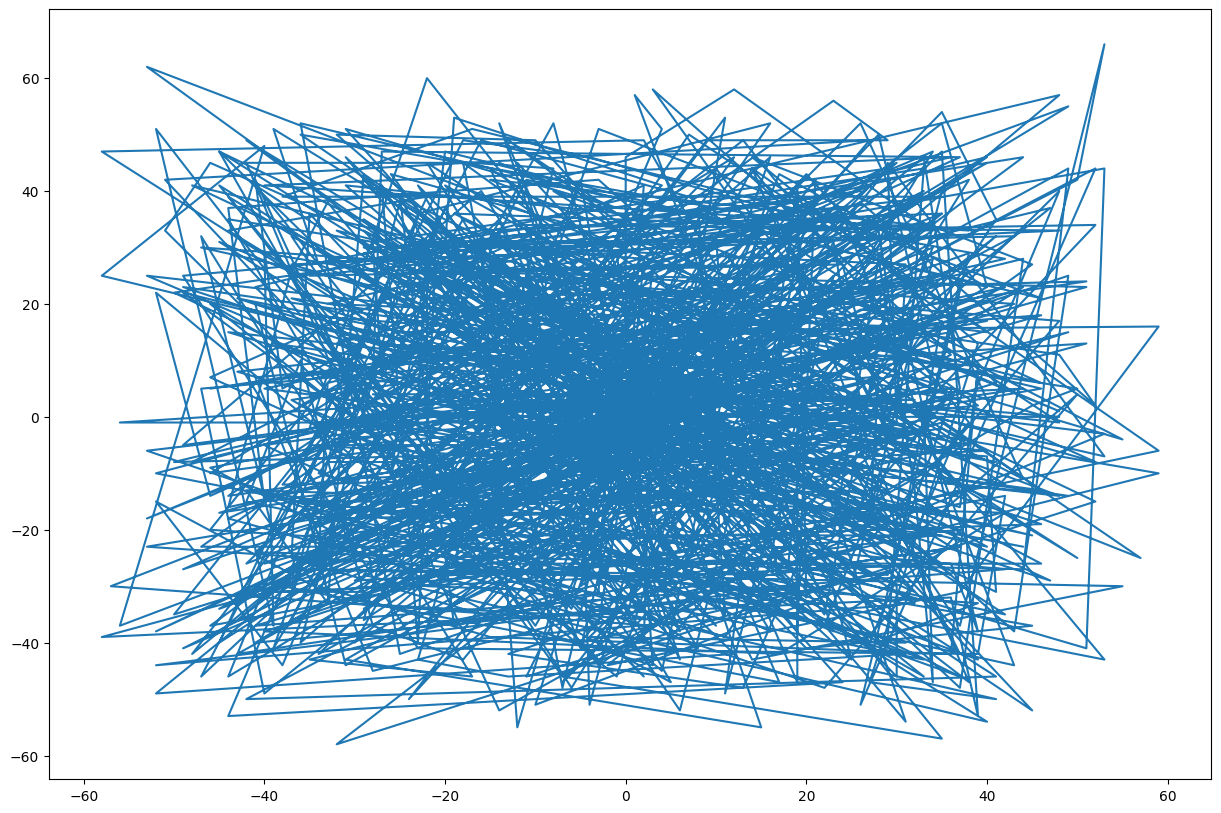

In [32]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

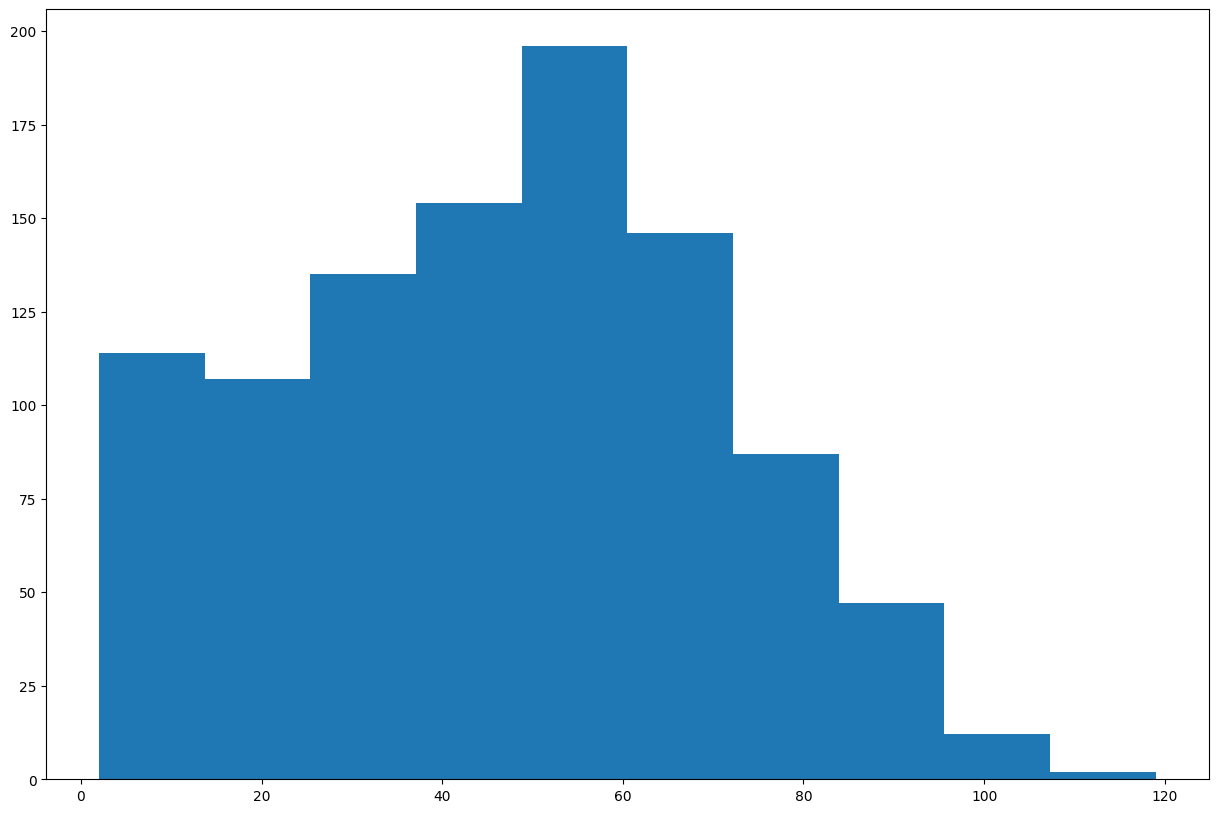

In [33]:
f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

The more wormholes you add to the list, the more chaotic the walk graph becomes.

The process still tends towards the normal distribution, but now you have introduced a process that prevents  normalization.

### Characterizing the Process that Leads to Chaos / Denormalization

1. There must be a **sufficient #** of wormholes.
2. The wormholes **must be within the range sqrt(n)**, as an approximation of mean distance traveled - otherwise they are very unlikely to be hit, and the walk will function like the fair random walk.
3. The "teleportation" mechanism must possibly move the walker **more than mean distance away** from their current coordinates

If we meet these criteria, the wormhole experiment will produce an outcome that will successfully DENORMALIZE the distribution of the distances.

In [34]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    1000.00000
mean        0.30000
std        27.94421
min       -58.00000
25%       -22.00000
50%         0.00000
75%        23.25000
max        59.00000
dtype: float64

In [35]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    1000.000000
mean        1.016000
std        28.173027
min       -58.000000
25%       -21.000000
50%         0.000000
75%        24.000000
max        66.000000
dtype: float64

In [36]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    1000.00000
mean       46.65800
std        23.87939
min         2.00000
25%        29.75000
50%        48.00000
75%        63.00000
max       119.00000
dtype: float64

In [37]:
print("The mean distance walked is", stats[1])

The mean distance walked is 46.658


In [38]:
print("The variance is", stats[2]**2)

The variance is 570.2252612612612


In [39]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 70.53738988461097


In [40]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 22.77861011538902


In [41]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is -1.3419999999999987
